#General info

###What is Stroke ?

It happens when the brain's blood vessels become narrowed or blocked, causing severely reduced blood flow.

Blocked or narrowed blood vessels are caused by fatty deposits that build up in blood vessels or by blood clots or other debris that travel through your bloodstream and lodge in the blood vessels in your brain.

1.  id: unique identifier
2.  gender: "Male", "Female" or "Other"
3.  age: age of the patient
4.  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5.  heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6.  ever_married: "No" or "Yes"
7.  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8.  Residence_type: "Rural" or "Urban"
9.  avg_glucose_level: average glucose level in blood
10.  bmi: body mass index
11.  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12.  stroke: 1 if the patient had a stroke or 0 if not

**Data** : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#Problem Definition


#Libaries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#general tools
import numpy as np
import pandas as pd
import scipy as sp
from numpy import mean

#SKL
from sklearn.preprocessing import LabelEncoder

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score ,StratifiedShuffleSplit, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import make_scorer, fbeta_score, matthews_corrcoef, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Upload the data

In [ ]:
def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

In [ ]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1pPNDUrxfKVM1pmtBmlJ91LsdVbR_fUD5/view?usp=sharing')
data = pd.read_csv(path)
BU=data.copy(deep = True) 
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.shape

(5110, 12)

#Data Exploration & Pre Processing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#put average value for null BMI
bmi_mean = data['bmi'].mean()
data['bmi'].fillna(value=bmi_mean, inplace=True)
print('bmi_mean:', bmi_mean)

#check nulls:
print('num of nulls:')
print(data.isnull().sum().sum(),'\n')

#Removing the one instance of gender "other"
data=data[~(data.gender=='Other')]

#check Duplicates:
print('max of row appearence')
data.id.value_counts().max()

#resetting index
data = data.reset_index()
data = data.drop(columns='index')

bmi_mean: 28.893236911794673
num of nulls:
0 

max of row appearence


In [ ]:
# Dropping ID column
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


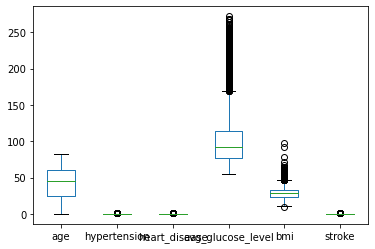

In [ ]:
data.plot(kind='box')
plt.show()

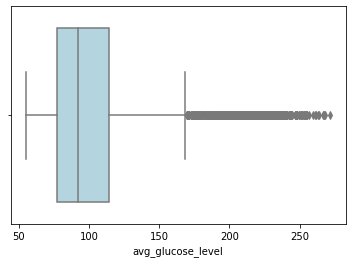

In [ ]:
sns.boxplot(data.avg_glucose_level, color='lightblue' )
plt.show()

Since they comprise about 25% of the data, we decided to keep them

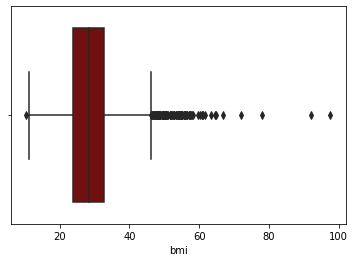

In [ ]:
sns.boxplot(data.bmi, color='Maroon')
plt.show()

It seems that there are some outlayers, which we think caused by mistake in data collection

In [ ]:
data.bmi.sort_values()

1609    10.3
3306    11.3
2187    11.5
657     12.0
922     12.3
        ... 
1559    66.8
544     71.9
928     78.0
4208    92.0
2128    97.6
Name: bmi, Length: 5109, dtype: float64

In [ ]:
print(data.iloc[[1559, 544, 928, 4208, 2128]])

      gender   age  hypertension  ...   bmi smoking_status stroke
1559  Female  53.0             0  ...  66.8        Unknown      0
544     Male  42.0             0  ...  71.9   never smoked      0
928   Female  23.0             1  ...  78.0         smokes      0
4208    Male  38.0             1  ...  92.0   never smoked      0
2128    Male  17.0             1  ...  97.6        Unknown      0

[5 rows x 11 columns]


In [ ]:
data = data.drop(1559)
data = data.drop(544)
data = data.drop(928)
data = data.drop(4208)
data = data.drop(2128)


In [ ]:
#resetting index
data = data.reset_index()
data = data.drop(columns='index')

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5099,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5100,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5101,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5102,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


No handles with labels found to put in legend.


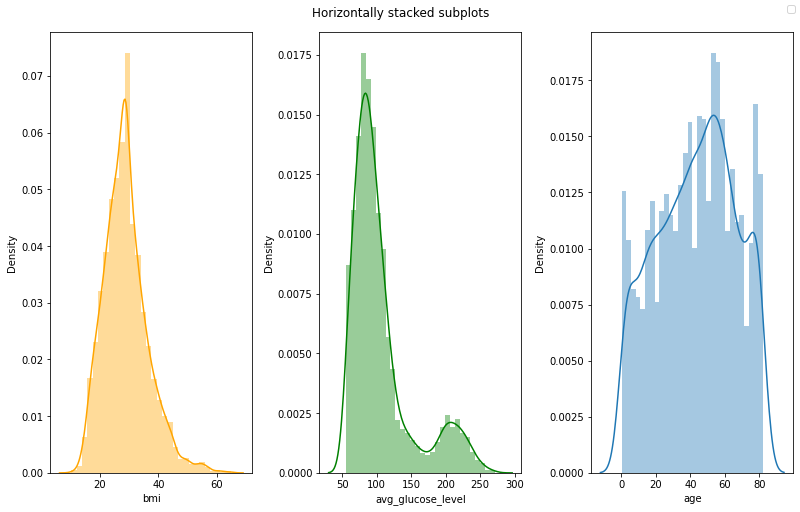

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
sns.distplot(data.bmi, color="orange", kde= True,ax=axes[0], bins=30,)
sns.distplot(data.avg_glucose_level, color="green", kde= True,ax=axes[1],bins=30)
sns.distplot(data.age, kde= True,ax=axes[2],bins=30)
fig.suptitle('Horizontally stacked subplots')
fig.legend();


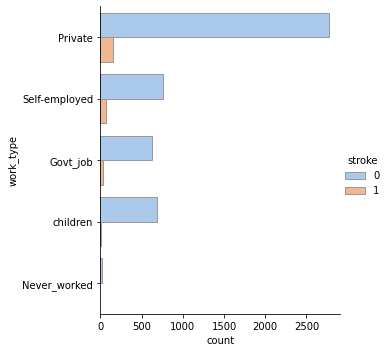

In [ ]:
#Work Type
sns.catplot(y="work_type", hue="stroke", kind="count",palette="pastel", edgecolor=".6",data=data);

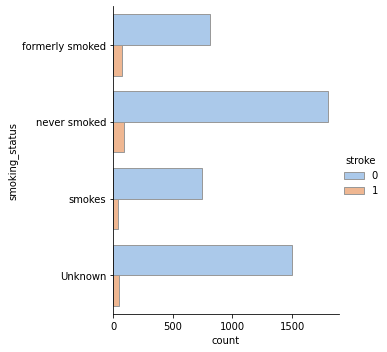

In [ ]:
##SMOKING status
sns.catplot(y="smoking_status", hue="stroke", kind="count",palette="pastel", edgecolor=".6",data=data)

📌 1. Proportion-wise, people working in the private sector and those who has a government job, suffer similarily from stroke. Moreover, self-emploed people are more likely to have a stroke while children will rarely have one. The above may be explained by a pressure that a work-load might cause.

📌 2. In contrass to what we first thought, having a stroke doesn't seems highly correlated to smoking status.

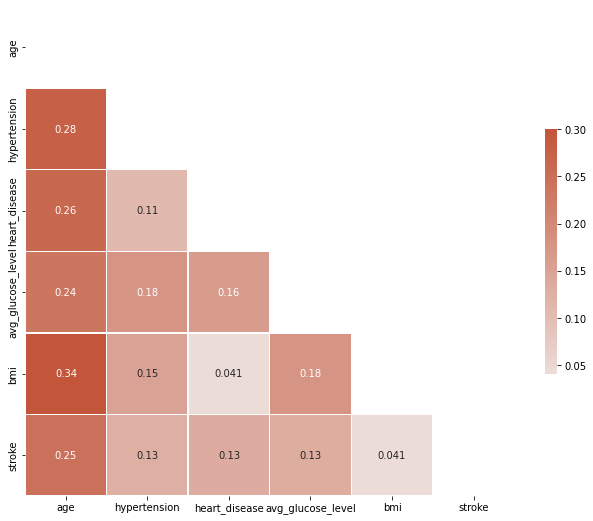

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [ ]:
c = data.groupby(['work_type'])['stroke'].value_counts()
d = data.groupby(['work_type'])['stroke'].count()
c/d

work_type      stroke
Govt_job       0         0.949772
               1         0.050228
Never_worked   0         1.000000
Private        0         0.948955
               1         0.051045
Self-employed  0         0.920635
               1         0.079365
children       0         0.997089
               1         0.002911
Name: stroke, dtype: float64

In [ ]:
cat_df = data[['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary2 = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke,normalize=True) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary2 = summary2.rename(columns={0: '0 normalized', 1 :'1 normalized'})
summary3 = pd. concat([summary, summary2], axis=1)
summary3

stroke                             0    1  0 normalized  1 normalized
gender         Female           2851  141      0.558582      0.027625
               Male             2004  108      0.392633      0.021160
hypertension   0                4426  183      0.867163      0.035854
               1                 429   66      0.084052      0.012931
heart_disease  0                4626  202      0.906348      0.039577
               1                 229   47      0.044867      0.009208
ever_married   No               1725   29      0.337970      0.005682
               Yes              3130  220      0.613245      0.043103
work_type      Govt_job          624   33      0.122257      0.006466
               Never_worked       22    0      0.004310      0.000000
               Private          2770  149      0.542712      0.029193
               Self-employed     754   65      0.147727      0.012735
               children          685    2      0.134208      0.000392
Residence_type Rural            2395  114      0.469240      0.022335
               Urban            2460  135      0.481975      0.026450
smoking_status Unknown          1495   47      0.292908      0.009208
               formerly smoked   814   70      0.159483      0.013715
               never smoked     1800   90      0.352665      0.017633
               smokes            746   42      0.146160      0.008229

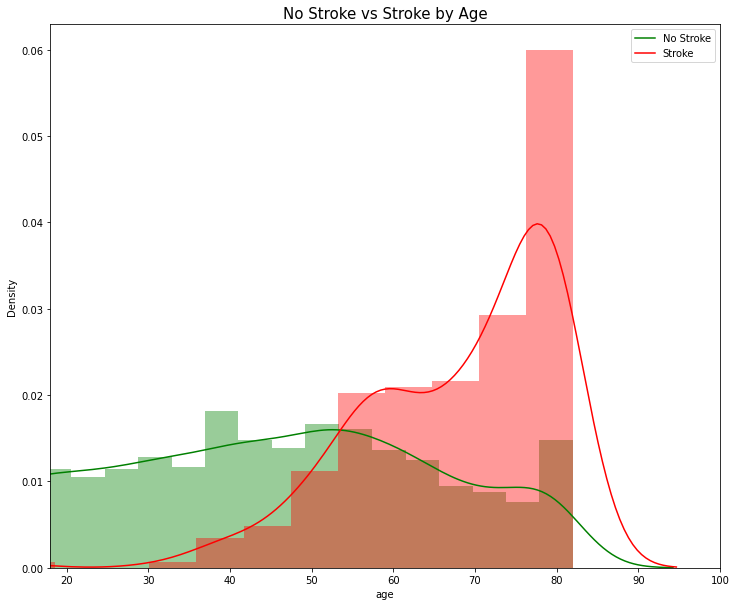

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.legend(['No Stroke','Stroke'])
plt.xlim([18,100])
plt.show();

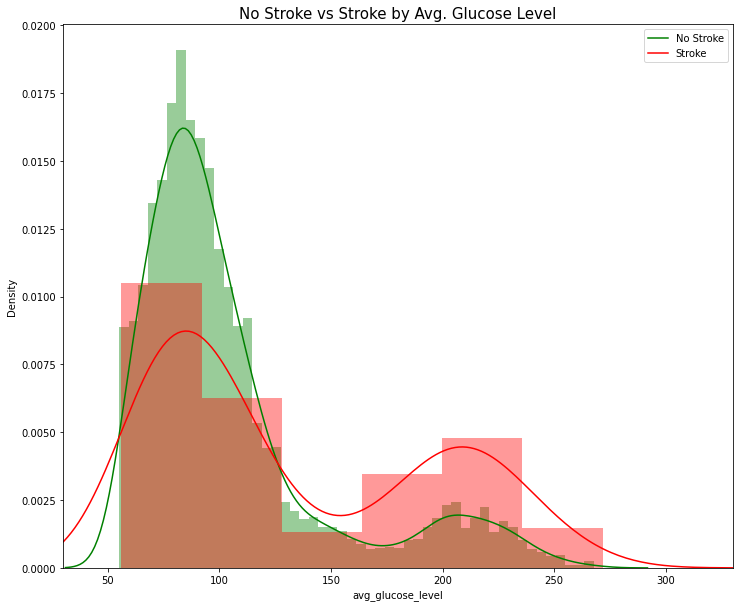

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
# plt.suptitle('No Stroke - green, Stroke - Red ')
plt.legend(['No Stroke','Stroke'])
plt.show()

0    4855
1     249
Name: stroke, dtype: int64


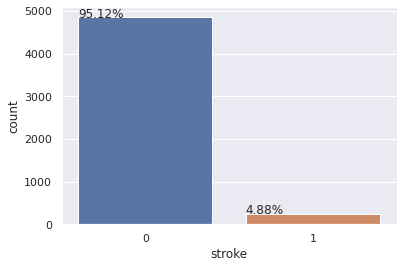

In [ ]:
print(data.stroke.value_counts())
total_stroke = data.stroke.count()
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="stroke")

for p in ax.patches:
    txt = str(((p.get_height()/total_stroke)*100).round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)

##Encoding

In [ ]:
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
data["gender"] = data["gender"].apply(lambda x: 1 if x=="Male" else 0)
 
data = pd.get_dummies(data=data, columns=['smoking_status'])
data = pd.get_dummies(data=data, columns=['work_type'])

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,0,1,0


In [ ]:
# sns.pairplot(data=BU, hue='stroke')

In [ ]:
# ax=data[data.stroke !=1].plot.scatter(x='age', y='hypertension', c="k", s=0.5,alpha=0.5,figsize=(20,10)) #ax זה הצירים
# data[data.stroke ==1].plot.scatter(x='age', y='avg_glucose_level', c="r", s=5,alpha=0.5, ax=ax) #ax argument allowed us to compare the axix of two charts #את הצבע נשים באדם
# ax.set_aspect(0.01)

## StandardScaler

In [ ]:
scaled_Data = data.copy(deep=True)
df2 = scaled_Data[['avg_glucose_level','bmi','age']]

std=StandardScaler()
scaled_col = std.fit_transform(df2)
scaled_col = pd.DataFrame(scaled_col,columns=['avg_glucose_level','bmi','age'])

scaled_Data=scaled_Data.drop(columns=['avg_glucose_level','bmi','age'],axis=1)
scaled_Data=scaled_Data.merge(scaled_col, left_index=True, right_index=True, how = "left")


## Splitting the Data to Train-Test

In [ ]:
# labale & feature seperation
X = data.drop(columns='stroke')     
y= data['stroke']

#split train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=data.stroke, random_state=1234)


## OverSampling (train data only)

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 174
Before OverSampling, counts of label '0': 3398 

After OverSampling, the shape of train_X: (6796, 17)
After OverSampling, the shape of train_y: (6796,) 

After OverSampling, counts of label '1': 3398
After OverSampling, counts of label '0': 3398


In [ ]:
#Do the train data with OS
X_train= pd.DataFrame(X_train_res, columns=X_train.columns) ########### לשנות את השם
y_train= pd.Series(y_train_res)

##Feature selection

In [ ]:
numFeatures   = 5
vMethods      = [chi2, f_classif, mutual_info_classif]
vMethodsSring = ['Chi 2', 'ANOVA F Value', 'Mutual Informatiom']

mMutualSelection = np.zeros((len(vMethods), X_train.shape[1]), dtype=bool)

for ii, iMethod in enumerate(vMethods):
  mMutualSelection[ii, :] = SelectKBest(score_func = iMethod, k = numFeatures).fit(X_train, y_train).get_support()

dfMutualSelection = pd.DataFrame(data = mMutualSelection, index = vMethodsSring, columns = X_train.columns, copy = True)
dfMutualSelection.index.name = 'Method'

dfMutualSelection

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
Method,,,,,,,,,,,,,,,,,
Chi 2,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True
ANOVA F Value,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
Mutual Informatiom,True,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [ ]:
# שימוש בפיצ'רים החשובים ביותר לפי השיטות חישוב השונות (לשקול לשנות שם לחלוקה לאחר בחירת פיצ'רים)
X_train= X_train[['age','hypertension','heart_disease','avg_glucose_level']]
X_test= X_test[['age','hypertension','heart_disease','avg_glucose_level']]

#Models



## Score Functions



Since our goal is to predict a dangerouse medical condition, we shall give more attention to the Recall function. With that being said, we still would like to avoid an "all-true" model so we shall find a better scoring function to use while choosing the best parameters for a model, in a way that we give our Recall more attention.
Thus, the first option that was on our mind was the F-score when choosing beta to be 2 in order to favor Recall over precision.
https://en.wikipedia.org/wiki/F-score


Since our data is imballanced, we decided to take into account two more possible scroring function:
1. Ballanced Accuracy
https://statisticaloddsandends.wordpress.com/2020/01/23/what-is-balanced-accuracy/

2. Matthews correlation coefficient
https://en.wikipedia.org/wiki/Matthews_correlation_coefficient


## Gradient Boosting

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(max_depth = 5, n_estimators = 300, learning_rate = 0.01, random_state = 1234)
clf_GB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('DT Gradient Boosting', 
            accuracy_score(clf_GB.predict(X_train), y_train), 
            accuracy_score(clf_GB.predict(X_test), y_test)))

DT Gradient Boosting classifier:
     	train accuracy: 0.90
     	test accuracy: 0.84


In [ ]:
y_pred_GB=clf_adaboost.predict(X_test)

In [ ]:
cm_GB = confusion_matrix(y_true=y_test, y_pred=y_pred_GB)
pd.DataFrame(cm_GB, index=clf_GB.classes_, columns=clf_GB.classes_)

,0,1
0,1069,388
1,17,58


## **Ada Boosting**

In [ ]:
clf_base = DecisionTreeClassifier(max_depth = 5, random_state = 1234)# ,class_weight={0:1, 1:4.5})

In [ ]:
clf_base= LogisticRegression(random_state = 1234)#,C=1e-05)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(base_estimator = clf_base, n_estimators = 300, learning_rate = 1e-03, random_state = 1234)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=1234,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.001, n_estimators=300, random_state=1234)

In [ ]:
print(f"DT ADA boosting classifier:\n \
    \ttrain accuracy: {accuracy_score(clf_adaboost.predict(X_train), y_train):.2f}\n \
    \ttest accuracy: {accuracy_score(clf_adaboost.predict(X_test), y_test):.2f}")

DT ADA boosting classifier:
     	train accuracy: 0.77
     	test accuracy: 0.74


In [ ]:
y_pred_ada=clf_adaboost.predict(X_test)

In [ ]:
cm_ada = confusion_matrix(y_true=y_test, y_pred=y_pred_ada)
pd.DataFrame(cm_ada, index=clf_adaboost.classes_, columns=clf_adaboost.classes_)

,0,1
0,1069,388
1,17,58


## Ensemble method

In [ ]:
#הגדרת 3 מסווגים
from sklearn.tree import DecisionTreeClassifier
clf1 = LogisticRegression(random_state = 1234, class_weight={0: 1, 1: 95},C=1e-05)
clf2 = DecisionTreeClassifier(max_depth = 5, random_state = 1234)
clf3 = SVC(probability = True, random_state = 1234,kernel='rbf')

classifiers = [('LR', clf1), ('DT', clf2), ('SVM', clf3)]

In [ ]:
from sklearn.ensemble import VotingClassifier
clf_voting = VotingClassifier(estimators = classifiers, voting = 'soft') 
clf_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1e-05,
                                                 class_weight={0: 1, 1: 95},
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1234,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     c

In [ ]:
clf_voting.predict_proba(X_train) #<! Exist only for `soft` mode

array([[0.6178564 , 0.3821436 ],
       [0.36810544, 0.63189456],
       [0.33846176, 0.66153824],
       ...,
       [0.06991964, 0.93008036],
       [0.16926853, 0.83073147],
       [0.07323614, 0.92676386]])

In [ ]:
y_pred=clf_voting.predict(X_test)

In [ ]:
print(f"train accuracy: {clf_voting.score(X_train, y_train):.2f}\n\
test accuracy: {clf_voting.score(X_test, y_test):.2f}")

train accuracy: 0.76
test accuracy: 0.54


In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
pd.DataFrame(cm, index=clf_voting.classes_, columns=clf_voting.classes_)

,0,1
0,753,704
1,4,71


In [ ]:
params  = {'LR__C': [1e-5,10,50],'LR__class_weight':[{0: 1, 1: 95},{0: 1, 1: 100},{0: 1, 1: 80}],
           'SVM__kernel': ['rbf']}
grid  = GridSearchCV(estimator=clf_voting, param_grid=params, scoring='f1')

In [ ]:
grid .fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=VotingClassifier(estimators=[('LR',
                                                     LogisticRegression(C=1e-05,
                                                                        class_weight={0: 1,
                                                                                      1: 95},
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                

In [ ]:
grid .best_score_

0.9741037858442345

In [ ]:
grid .best_params_


{'LR__C': 1e-05, 'LR__class_weight': {0: 1, 1: 100}, 'SVM__kernel': 'rbf'}

##Logistic Regression

In [ ]:
data_LR = LogisticRegression( )#, class_weight={0: 1, 1: 95})
F=data_LR.fit(X_train, y_train)

score = data_LR.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = data_LR.score(X_train, y_train)
logistic_test = data_LR.score(X_test, y_test)
#== 
treshold=0.5
y_pred= data_LR.predict_proba(X_test)[:,1]>=treshold
print(classification_report(y_test, y_pred))

Testing Score 
 0.7389033942558747
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1457
           1       0.14      0.81      0.23        75

    accuracy                           0.74      1532
   macro avg       0.56      0.77      0.54      1532
weighted avg       0.95      0.74      0.81      1532



https://stats.stackexchange.com/questions/384833/adjusting-probability-threshold-for-sklearns-logistic-regression-model

In [ ]:
#Asess the Model
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
pd.DataFrame(cm, index=data_LR.classes_, columns=data_LR.classes_)

,0,1
0,1055,402
1,16,59


In [ ]:
# הפרמטרים שהמודל השתמש, שנדע בשביל גריד...
data_LR.get_params()

{'C': 1e-05,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}



### StratifiedShuffleSplit

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit  # מגריל כמה פעמים חלוקה לטריין וטסט בגודל 75 אחוז
my_cv = StratifiedShuffleSplit(n_splits = 5, train_size = 0.75, random_state = 1234) #<! See https://scikit-learn.org/stable/modules/classes.html#splitter-classes


In [ ]:
-cross_val_score(F, X_train, y_train, cv=my_cv, scoring='neg_log_loss') #<! Make sure there at least n_splits of each lable by y_train.val_counts()


array([0.47762865, 0.4522605 , 0.4804012 , 0.47269518, 0.47517296])

### Grid Search & Cross Validation

In [ ]:
my_param_grid = {'C': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3], 'penalty': ['l1', 'l2', 'elasticnet']} #, 'class_weight':[]}
#<! my_cv -> n_splits = 5
lr_model = GridSearchCV(estimator=LogisticRegression(max_iter=10), param_grid=my_param_grid, scoring='recall', cv=my_cv)

In [ ]:
from time import time
t1 = time()
lr_model.fit(X_train, y_train)
t2 = time()
print(f"It took {t2-t1:.2f} seconds")

It took 0.98 seconds


In [ ]:
# %%time
lr_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1234, test_size=None,
            train_size=0.75),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='reca

In [ ]:
lr_model.best_score_

0.8394900575071016

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, lr_model.predict_proba(X_test)) #<! Pay attention, for log loss we use predict probability and not predict

0.7965491261374156

In [ ]:
lr_model.best_params_


{'C': 1e-05, 'penalty': 'l2'}

אחרי שמצאנו את הערכים של הפרמטרים הכי טובים אפשר לעשות גריד על ערכים באיזור אלה שקיבלנו

##SVM

### SVM - Basic Classifier

In [ ]:
# Simple SVC classifier only:

# Defining the SVC classifier:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)

#Score  
svc_score = clf_svc.score(X_train, y_train)
svc_test = clf_svc.score(X_test, y_test)

#testing model  
y_pred = clf_svc.predict(X_test)

#evaluation
svc_cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(svc_cm)

Training Score 0.7666274278987639
Testing Score 
 0.6919060052219321
[[996 461]
 [ 11  64]]


### SVM - Cross Validation

In [ ]:
# Using cross validation with the SVC 

k=7
custom_iter = StratifiedShuffleSplit(n_splits=k, train_size=0.75, test_size=0.25)
scores = cross_val_score(clf_svc, X_train, y_train, cv=custom_iter)

print("Scores : " + (k * "{:.3f} ").format(*scores))

Scores : 0.753 0.754 0.756 0.766 0.776 0.761 0.765 


### SVM - GridSearch

In [ ]:
# #Using grid search with SVC
# %%time
# param_grid = [
#   {'C': [1, 10, 100], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
#   ]

# clf_svc_gs = GridSearchCV(SVC(), param_grid, cv=2)
# clf_svc_gs.fit(X_train, y_train)

# #presenting the results
# print("Best parameters set found on development set:\n")
# print(clf_svc_gs.best_params_,'\n')
# print("Grid scores on development set:\n")
# means = clf_svc_gs.cv_results_['mean_test_score']
# stds = clf_svc_gs.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf_svc_gs.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
# print("\nDetailed classification report:\n")
# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.\n")
# y_true, y_pred = y_test, clf_svc_gs.predict(X_test)
# print(classification_report(y_true, y_pred))

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 

Grid scores on development set:

0.764 (+/-0.001) for {'C': 1, 'kernel': 'linear'}
0.765 (+/-0.001) for {'C': 10, 'kernel': 'linear'}
0.768 (+/-0.006) for {'C': 100, 'kernel': 'linear'}
0.778 (+/-0.014) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.763 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.782 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.771 (+/-0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.791 (+/-0.015) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.774 (+/-0.014) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.815 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.775 (+/-0.021) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

        

After checking a few variations of hyperparameters changing using grid search - it seems that all parameters gives the same results.

---

### Scaling using StandartScaler and using svc

In [ ]:
# Scaling using Standard Scaler
df = data.copy(deep=True)
df = df.reset_index()
# df.drop(columns='index')     # <--- this will give a great score!!!
df = df.drop(columns='index')     # <--- this will give a normal score, why ???
df2 = df[['avg_glucose_level','bmi','age']]

std=StandardScaler()
scaled_col = std.fit_transform(df2)
scaled_col = pd.DataFrame(scaled_col,columns=['avg_glucose_level','bmi','age'])
scaled_col.isna().sum()

df=df.drop(columns=['avg_glucose_level','bmi','age'],axis=1)
df=df.merge(scaled_col, left_index=True, right_index=True, how = "left")

In [ ]:
# labale & feature seperation
X2 = df.drop(columns='stroke')        # 
y2= df['stroke']

#split train Test
trainSize = 0.75
randState = 990
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = trainSize, random_state = randState, stratify=df.stroke)


In [ ]:
sum(y2_train)

187

In [ ]:

# Defining the SVC classifier:
clf_scaled_svc = SVC(random_state=0)
clf_scaled_svc.fit(X2_train, y2_train)

#Score  
scaled_svc_score = clf_scaled_svc.score(X2_train, y2_train)
scaled_svc_test = clf_scaled_svc.score(X2_test, y2_test)

#testing model  
y2_pred = clf_scaled_svc.predict(X2_test)

#evaluation
scaled_svc_cm = confusion_matrix(y2_test,y2_pred)
print('Training Score',scaled_svc_score)
print('Testing Score \n',scaled_svc_test)
print(scaled_svc_cm)
print(classification_report(y2_test, y2_pred))

Training Score 0.9511494252873564
Testing Score 
 0.95141065830721
[[1214    0]
 [  62    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1214
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1276
   macro avg       0.48      0.50      0.49      1276
weighted avg       0.91      0.95      0.93      1276



In [ ]:
# validating using Cross validation
k=7
custom_iter = StratifiedShuffleSplit(n_splits=k, train_size=0.75, test_size=0.25)
scores = cross_val_score(clf_scaled_svc, X2_train, y2_train, cv=custom_iter)

print("Scores : " + (k * "{:.3f} ").format(*scores))

Scores : 0.951 0.951 0.951 0.951 0.951 0.951 0.951 


much better score was achived after scaling

### Pipeline

#### Simple Single pipeline

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer

def get_cols_4_ss(df):
    return df[['avg_glucose_level','bmi','age']]

def get_non_trans_cols(df):
    return df.drop(columns=['avg_glucose_level','bmi','age'])

ss_selector = FunctionTransformer(func=get_cols_4_ss, validate=False)
no_trans_selector = FunctionTransformer(func=get_non_trans_cols, validate=False)

ss_pipeline = Pipeline([('ss_selector', ss_selector), ('ss', StandardScaler())])
no_trans_pipeline = Pipeline([('no_trans_selector', no_trans_selector)])

trans_pipeline = FeatureUnion([('non_transformed',no_trans_pipeline),
                               ('ss_pipeline', ss_pipeline)])

prepared_train = trans_pipeline.fit_transform(X_train)

SVM_pipeline = Pipeline([('trans_pipeline', trans_pipeline),
                          ('SVC', SVC(random_state=0))])

# SVM_pipeline = Pipeline([('svc classifier', SVC(random_state=0))])
SVM_CROSS_VAL = cross_val_score(SVM_pipeline,X_train,y_train,cv=10,scoring='f1')

SVM_pipeline.fit(X_train, y_train)
y_train_pred = SVM_pipeline.predict(X_train)
y_test_pred = SVM_pipeline.predict(X_test)
SVM_pipeline.score(X_train, y_train)
# f1_score(y_train, y_train_pred)

0.9301059446733373

#### Multiple pipelines

SVM

StandardScaler -> SVM

OverSampling -> SVM

OverSampling -> StandardScaler -> SVM

SelectKBest -> OverSampling -> StandardScaler -> SVM



In [ ]:
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, fbeta_score, matthews_corrcoef, balanced_accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# define scoring functions:
ftwo_scorer = make_scorer(fbeta_score, beta=2)
mcc_scorer = make_scorer(matthews_corrcoef)
Bal_acc_scorer = make_scorer(balanced_accuracy_score)

scoring = {'AUC': 'roc_auc', 'Ballanced Accuracy': Bal_acc_scorer, 'F_2 score':ftwo_scorer, 'MCC':mcc_scorer}

In [ ]:
# define pipeline
clf_svc = SVC(C = 1000, gamma= 0.001, kernel= 'rbf')
clf_LR = lr_model

steps = [('model', clf_svc)]
steps2 = [('trans_pipeline', trans_pipeline),('model', clf_svc)]
steps3 = [('trans_pipeline', trans_pipeline),('over', SMOTE()), ('model', clf_svc)]
steps4 = [('model', clf_LR)]
steps5 = [('trans_pipeline', trans_pipeline),('model', clf_LR)]
steps6 = [('trans_pipeline', trans_pipeline),('over', SMOTE()), ('model', clf_LR)]

pipeline = Pipeline(steps=steps)
pipeline2 = Pipeline(steps=steps2)
pipeline3 = Pipeline(steps=steps3)
pipeline4 = Pipeline(steps=steps4)
pipeline5 = Pipeline(steps=steps5)
pipeline6 = Pipeline(steps=steps6)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
# scores

In [ ]:
def get_scores_array(scores):
  results_arr = np.zeros((1,len(scoring)+2), dtype=float)
  for ii, (key, val) in enumerate(scores.items()):
    results_arr[:, ii]=val.mean()
  
  return results_arr[:,2:]

In [ ]:
pipes      = [pipeline, pipeline2, pipeline3, pipeline4, pipeline5, pipeline6]
pipesString = ['SVM only', "SVM Scaled", "SVM scaled and oversampled",'LogisticRegression','LR scaled','LR scaled and oversampled']


scoringResults = np.zeros((len(pipes), len(scoring)), dtype=float)

for ii, ipipe in enumerate(pipes):
  scoringResults[ii, :] = get_scores_array(cross_validate(ipipe, X, y, scoring=scoring, cv=cv, n_jobs=-1))

scoringResults
model_scores = pd.DataFrame(data = scoringResults, index = pipesString ,columns = scoring.keys())
model_scores

,AUC,Ballanced Accuracy,F_2 score,MCC
SVM only,0.696863,0.513015,0.042330,0.050684
SVM Scaled,0.737137,0.500000,0.000000,0.000000
SVM scaled and oversampled,0.825062,0.752457,0.381831,0.235627
LogisticRegression,0.532254,0.500434,0.002451,0.001964
LR scaled,0.822732,0.500000,0.000000,0.000000
LR scaled and oversampled,0.837962,0.764384,0.393143,0.247004


##Random Forest

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1532
   macro avg       0.48      0.50      0.49      1532
weighted avg       0.90      0.95      0.92      1532

ROC AUC score: 0.7895676046671242
Accuracy Score:  0.945822454308094


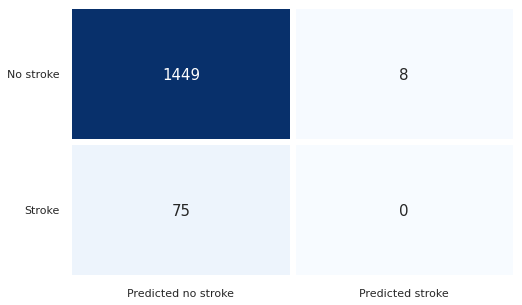

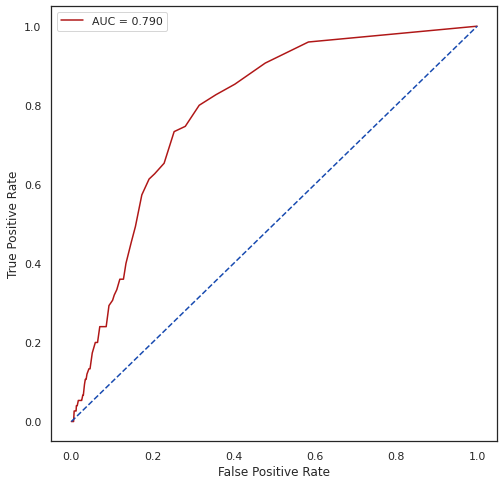

In [ ]:

# RandomForest 

#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Model Comparison



In [ ]:
#split train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=data.stroke, random_state=1234)

In [ ]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])


lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

SVM :
[[996 461]
 [ 11  64]]
Accuracy Score:  0.6919060052219321

K-Fold Validation Mean Accuracy: 76.53 %

Standard Deviation: 1.16 %

ROC AUC Score: 0.77

Precision: 0.12

Recall: 0.85

F1: 0.21
-----------------------------------

Random Forest :
[[1449    8]
 [  75    0]]
Accuracy Score:  0.945822454308094

K-Fold Validation Mean Accuracy: 97.29 %

Standard Deviation: 6.99 %

ROC AUC Score: 0.50

Precision: 0.00

Recall: 0.00

F1: 0.00
-----------------------------------



In [ ]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
            

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

#Summery

included in the presentation
